In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Train Dataset
train_df = pd.read_excel("Data_Train.xlsx")

In [3]:
#Test Dataset
test_df = pd.read_excel("Data_Test.xlsx")

In [4]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


 - We can see that we have got columns like [CITY, LOCALITY, RATING, VOTES] which are having NULL values:

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


 - We can see that we have got columns like [CITY, LOCALITY, RATING, VOTES] which are having NULL values:

In [8]:
#Printing Number of unique values in each columns of training data:
for col in train_df.columns.values:
    print("Number of unique values {} : {}".format(col,train_df[col].nunique()))

Number of unique values TITLE : 113
Number of unique values RESTAURANT_ID : 11892
Number of unique values CUISINES : 4155
Number of unique values TIME : 2689
Number of unique values CITY : 359
Number of unique values LOCALITY : 1416
Number of unique values RATING : 32
Number of unique values VOTES : 1847
Number of unique values COST : 86


In [9]:
#Printing Number of unique values in each columns of testing data:
for col in test_df.columns.values:
    print("Number of unique values {} : {}".format(col,test_df[col].nunique()))

Number of unique values TITLE : 86
Number of unique values RESTAURANT_ID : 4127
Number of unique values CUISINES : 1727
Number of unique values TIME : 1183
Number of unique values CITY : 151
Number of unique values LOCALITY : 834
Number of unique values RATING : 31
Number of unique values VOTES : 1136


# Data Pre-Processing

In [10]:
#Extracting Votes
train_df['VOTES'] = train_df['VOTES'].str.replace(' votes', '').astype(float)
test_df['VOTES'] = test_df['VOTES'].str.replace(' votes', '').astype(float)

In [11]:
# Addition of 'No_of_Cuisines' column:
train_df['No_of_Cuisines'] = train_df.CUISINES.apply(lambda x: len(x.split(',')))
test_df['No_of_Cuisines'] = test_df.CUISINES.apply(lambda x: len(x.split(',')))

In [12]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,No_of_Cuisines
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,3
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,3
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,4
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,2
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,1


In [13]:
train_df['RATING'] = train_df['RATING'].replace({'NEW':5.0,'-':0.0,np.nan:3.9}).astype(float)
test_df['RATING'] = test_df['RATING'].replace({'NEW':5.0,'-':0.0,np.nan:3.9}).astype(float)

 - Replaced 'NEW' with 5.0 and '-' with 0.0 and NaN value with the mode of the column

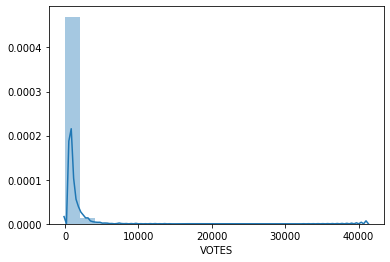

In [14]:
sns.distplot(train_df['VOTES'],bins=20)

 - We can see that the column VOTES is high positively skewed, so replacing the null values with the mean will not be a good option

In [15]:
## Replaced the null values in VOTES column of the training and testing dataset with the Median

train_df['VOTES'] = train_df['VOTES'].fillna(train_df['VOTES'].median())
test_df['VOTES'] = test_df['VOTES'].fillna(test_df['VOTES'].median())

In [16]:
## Replaced the null values in CITY column of the training and testing dataset with the Mode

train_df['CITY'] = train_df['CITY'].replace({np.nan:'Chennai'})
test_df['CITY'] = test_df['CITY'].replace({np.nan:'Banglore'})

In [17]:
## Replaced the null values in LOCALITY column of the training and testing dataset with the Mode

train_df['LOCALITY'] = train_df['LOCALITY'].replace({np.nan:'Gachibowli'})
test_df['LOCALITY'] = test_df['LOCALITY'].replace({np.nan:'Kukatpally'})

In [18]:
## Let's check the train dataset if we have any null values anymore
train_df.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
COST              0
No_of_Cuisines    0
dtype: int64

In [19]:
## Let's check the test dataset if we have any null values anymore

test_df.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
No_of_Cuisines    0
dtype: int64

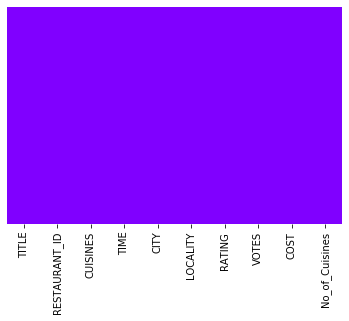

In [20]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

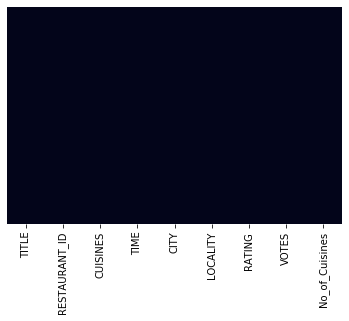

In [21]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [22]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,No_of_Cuisines
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,3
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,3
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,4
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,2
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,1


# VISUALIZATION:

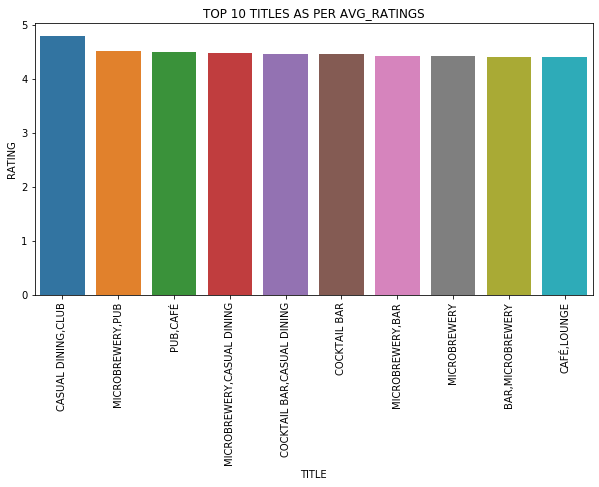

                              RATING
TITLE                               
CASUAL DINING,CLUB          4.800000
MICROBREWERY,PUB            4.525000
PUB,CAFÉ                    4.500000
MICROBREWERY,CASUAL DINING  4.477778
COCKTAIL BAR,CASUAL DINING  4.466667
COCKTAIL BAR                4.466667
MICROBREWERY,BAR            4.425000
MICROBREWERY                4.425000
BAR,MICROBREWERY            4.400000
CAFÉ,LOUNGE                 4.400000


In [23]:
## Top 10 TITLES with highest average Ratings:
plt.figure(figsize=(10,5))
asc=train_df.groupby('TITLE').agg({"RATING":"mean","VOTES":"mean"}).sort_values(["RATING"],ascending=False)
top_10_RATING= asc.drop('VOTES',axis=1).sort_values(["RATING"],ascending=False).head(10)
top_10_VOTES = asc.drop('RATING',axis=1).sort_values(["VOTES"],ascending=False).head(10)

sns.barplot(x=top_10_RATING.index,y=top_10_RATING["RATING"])
plt.title("TOP 10 TITLES AS PER AVG_RATINGS")
plt.xticks(rotation=90)
plt.show()



print(top_10_RATING)

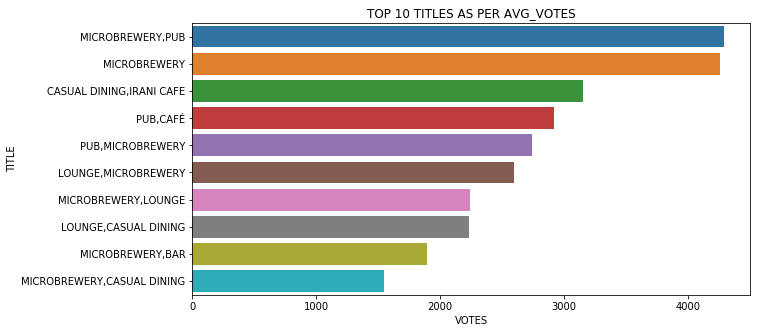

                                  VOTES
TITLE                                  
MICROBREWERY,PUB            4292.750000
MICROBREWERY                4257.875000
CASUAL DINING,IRANI CAFE    3153.333333
PUB,CAFÉ                    2921.000000
PUB,MICROBREWERY            2743.714286
LOUNGE,MICROBREWERY         2594.000000
MICROBREWERY,LOUNGE         2246.000000
LOUNGE,CASUAL DINING        2236.074074
MICROBREWERY,BAR            1897.500000
MICROBREWERY,CASUAL DINING  1549.074074


In [24]:
## Top 10 TITLES as per average Votes:
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_VOTES["VOTES"],y=top_10_VOTES.index)
plt.title("TOP 10 TITLES AS PER AVG_VOTES")
plt.show()

print(top_10_VOTES)

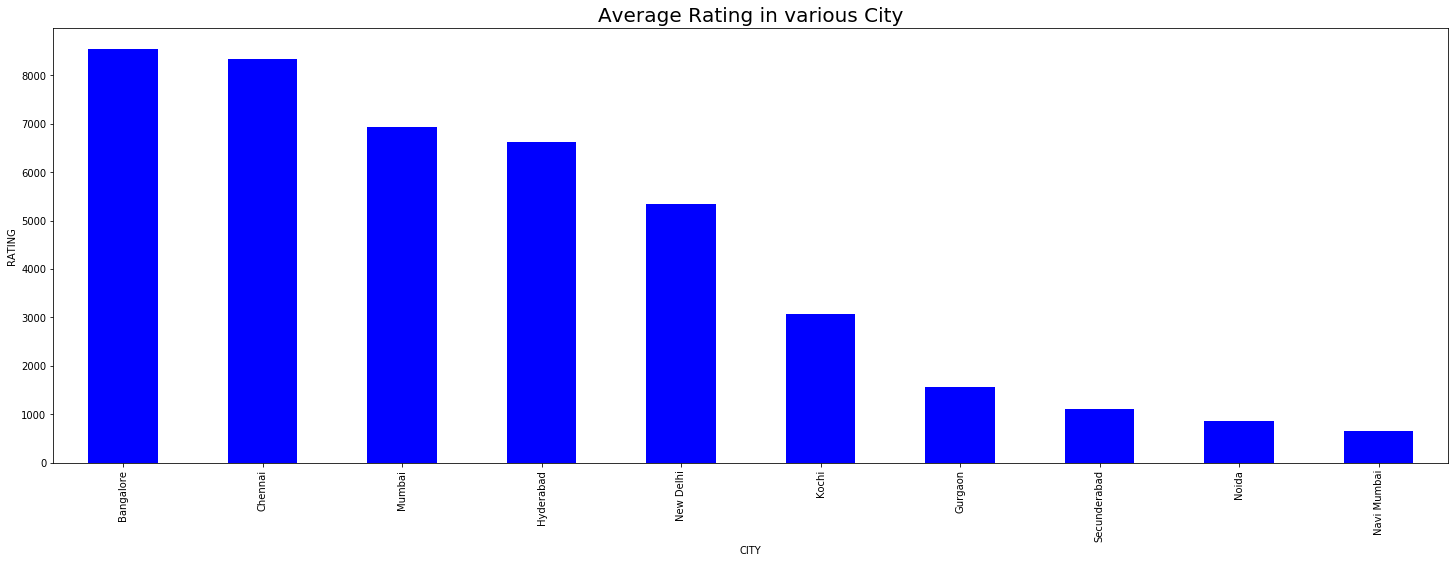

CITY
Bangalore       8556.0
Chennai         8348.2
Mumbai          6936.8
Hyderabad       6626.8
New Delhi       5336.8
Kochi           3080.6
Gurgaon         1562.9
Secunderabad    1116.5
Noida            852.5
Navi Mumbai      655.5
Name: RATING, dtype: float64


In [25]:
## CITY having highest rating for the hotel's:
plt.figure(figsize=(25,8))
df = train_df.groupby('CITY')['RATING'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar',color='b')
plt.xlabel("CITY")
plt.ylabel("RATING")
plt.title("Average Rating in various City",fontsize=20)
plt.show()

print(df.head(10))

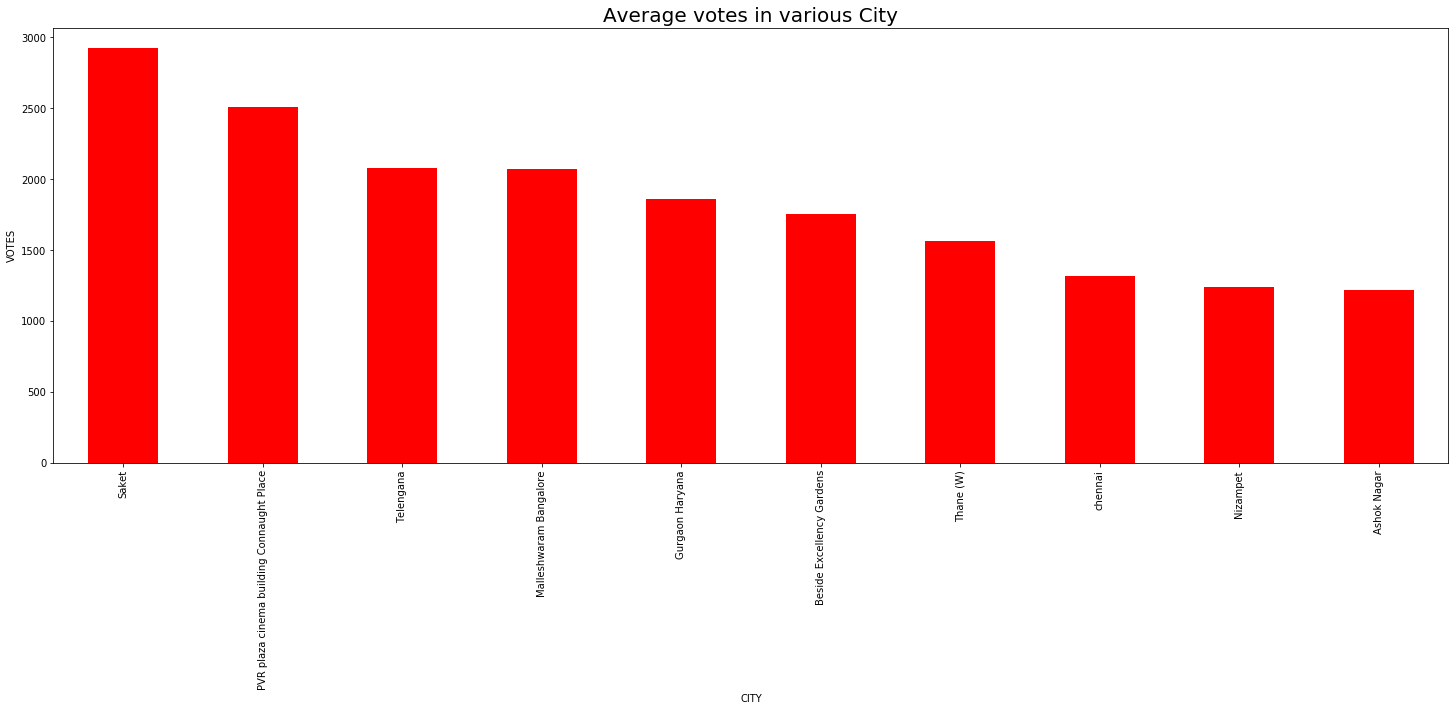

CITY
Saket                                        2923.0
PVR plaza cinema building Connaught Place    2512.0
Telengana                                    2079.0
Malleshwaram Bangalore                       2069.0
Gurgaon Haryana                              1858.0
Beside Excellency Gardens                    1751.0
Thane (W)                                    1561.0
chennai                                      1320.0
Nizampet                                     1236.0
Ashok Nagar                                  1220.0
Name: VOTES, dtype: float64


In [26]:
## CITY with highest average rating for their hotels:
plt.figure(figsize=(25,8))
df1 = train_df.groupby('CITY')['VOTES'].mean().sort_values(ascending=False)
df1.head(10).plot(kind='bar',color='r')
plt.xlabel("CITY")
plt.ylabel("VOTES")
plt.title("Average votes in various City",fontsize=20)
plt.show()

print(df1.head(10))

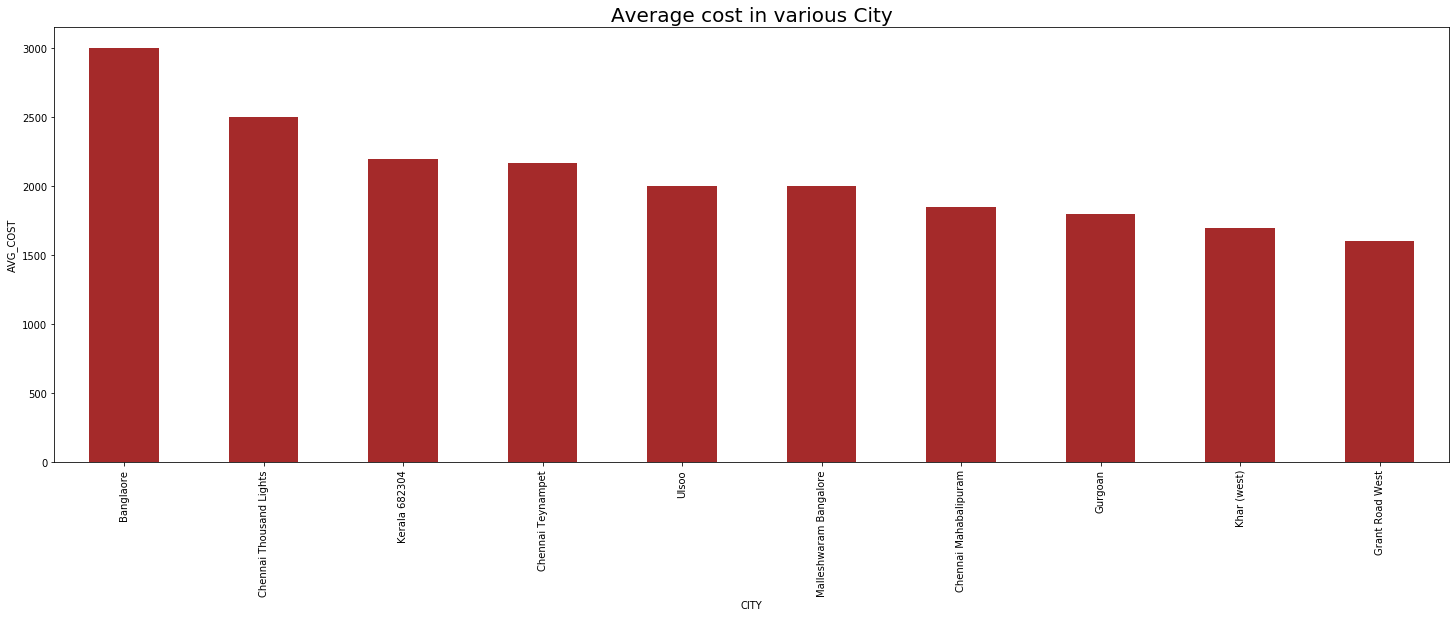

CITY
Banglaore                  3000.000000
Chennai Thousand Lights    2500.000000
Kerala 682304              2200.000000
Chennai Teynampet          2166.666667
Ulsoo                      2000.000000
Malleshwaram Bangalore     2000.000000
Chennai Mahabalipuram      1850.000000
Gurgoan                    1800.000000
Khar (west)                1700.000000
Grant Road West            1600.000000
Name: COST, dtype: float64


In [27]:
## TOP 10 cities with highest average cost of hotels:

plt.figure(figsize=(25,8))
df2 = train_df.groupby('CITY')['COST'].mean().sort_values(ascending=False)
df2.head(10).plot(kind='bar',color='brown')
plt.xlabel("CITY")
plt.ylabel("AVG_COST")
plt.title("Average cost in various City",fontsize=20)
plt.show()

print(df2.head(10))

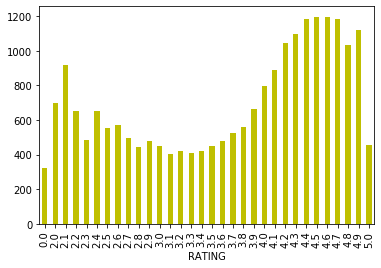

In [28]:
train_df.groupby(['RATING'])['COST'].mean().plot(kind='bar',color='y')

 - We can see how the cost is varying according to the Average Rating.

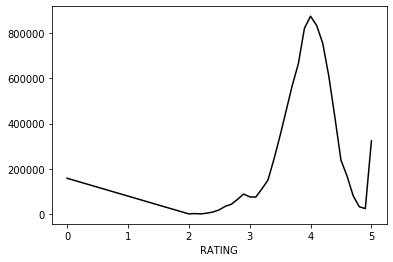

In [29]:
train_df.groupby(['RATING'])['COST'].sum().plot(kind='line',color='black')

 - We can see that the curve gradually comes down until it reaches rating 2. And then from 2 to 4 there is a linear increase in the food cost

In [30]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,No_of_Cuisines
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,3
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,3
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,4
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,2
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,1


 - Droping the TIME column as it dosen't have significant effect on Food Cost.

In [31]:
df9 = train_df.drop('TIME',axis=1)

In [32]:
df9.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,No_of_Cuisines
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49.0,1200,3
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30.0,1500,3
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221.0,800,4
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24.0,800,2
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165.0,300,1


In [33]:
## Label Encoding:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['TITLE','CITY','LOCALITY','CUISINES']
for i in variable:
    df9[i] = lb.fit_transform(df9[i])

In [34]:
df9.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,No_of_Cuisines
0,31,9438,2627,320,285,3.6,49.0,1200,3
1,33,13198,289,67,1046,4.2,30.0,1500,3
2,31,10915,2976,67,1101,3.8,221.0,800,4
3,95,6346,4130,222,136,4.1,24.0,800,2
4,50,15387,1766,222,620,3.8,165.0,300,1


In [35]:
## Removing the outliers using zscore:
from scipy.stats import zscore
z_score = abs(zscore(df9))
print(df9.shape)
train_df_final = df9.loc[(z_score<3).all(axis=1)]
print(train_df_final.shape)

(12690, 9)
(11612, 9)


In [36]:
## Checking the Skewness of the Data:
train_df_final.skew()

TITLE            -0.094362
RESTAURANT_ID     0.006746
CUISINES         -0.223938
CITY              0.314846
LOCALITY          0.336585
RATING            0.172483
VOTES             2.576973
COST              1.809894
No_of_Cuisines    0.658536
dtype: float64

 - VOTES AND COST COLUMN ARE HIGHLY SKEWED AS COMPARE TO OTHER COLUMNS 

In [37]:
train_df_final['VOTES'] = np.log1p(train_df_final['VOTES'])
train_df_final['COST'] = np.log1p(train_df_final['COST'])

In [38]:
train_df_final.skew()

TITLE            -0.094362
RESTAURANT_ID     0.006746
CUISINES         -0.223938
CITY              0.314846
LOCALITY          0.336585
RATING            0.172483
VOTES            -0.125227
COST              0.193940
No_of_Cuisines    0.658536
dtype: float64

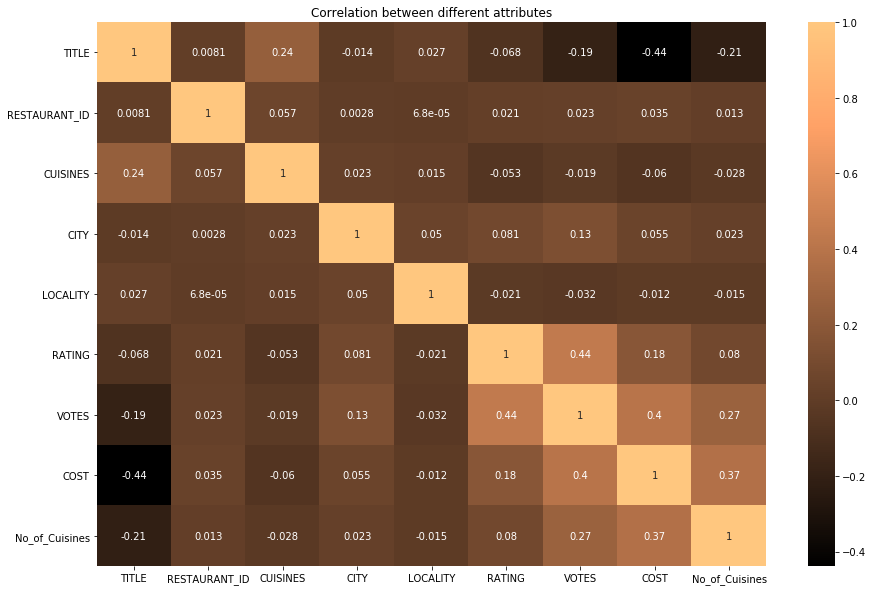

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df_final.corr(),vmax=1,annot=True,cmap='copper')
plt.title("Correlation between different attributes")
plt.show()

 - VOTES IS POSITIVELY CORRELATED WITH COST
 - RATING AND NO_OF CUISINES IS ALSO POSITIVELY CORRELATED WITH COST
 - TITLE IS NEGATIVELY CORRELATED WITH THE COST

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

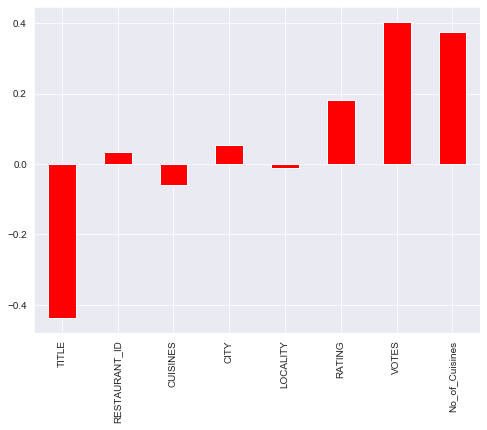

In [40]:
## Checking the correlation of the column with the target variable:
plt.figure(figsize=(8,6))
sns.set_style('dark')
train_df_final.drop(['COST'],axis=1).corrwith(train_df_final['COST']).plot(kind='bar',grid=True,color='r')
plt.xticks(rotation=90)

# Model Building: 

In [41]:
x = train_df_final.drop(['COST'],axis=1)
y = train_df_final[['COST']]

In [42]:
x.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,No_of_Cuisines
0,31,9438,2627,320,285,3.6,3.912023,3
1,33,13198,289,67,1046,4.2,3.433987,3
2,31,10915,2976,67,1101,3.8,5.402677,4
3,95,6346,4130,222,136,4.1,3.218876,2
4,50,15387,1766,222,620,3.8,5.111988,1


In [43]:
y.head()

,COST
0,7.090910
1,7.313887
2,6.685861
3,6.685861
4,5.707110


In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrices:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=60,test_size=0.3)

In [46]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of ',m," is: ",score)
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print("***********************************************************************************************")
    print("\n")

Score of  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  is:  0.34243849685118033
MAE: 0.40614545944100516
MSE: 0.2808629695151104
RMSE: 0.5299650644288832
r2_score: 0.36081798820747557
***********************************************************************************************


Score of  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)  is:  0.09706201145506321
MAE: 0.49978505932356965
MSE: 0.39844542783037334
RMSE: 0.6312253383938048
r2_score: 0.09322631392156744
***********************************************************************************************


Score of  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
               

 - THE BEST MODEL OUT OF ALL IS RANDOM FOREST REGRESSOR
 - SO WE WILL TRY TO HYPERTUNE IT AND GET THE BEST OF IT

In [47]:
## Cross-Validation

model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5,scoring='r2')
    print("Model: ",m)
    print("Score: ",score)
    print("Mean Score: ",score.mean())
    print("Standard deviation :",score.std())
    print("********************************************************************************")
    print("\n")

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score:  [0.32829582 0.35657401 0.34335431 0.33259759 0.34164723]
Mean Score:  0.3404937917454719
Standard deviation : 0.009790065192248325
********************************************************************************


Model:  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score:  [0.07265604 0.09103538 0.07469872 0.08781709 0.0790651 ]
Mean Score:  0.08105446897467053
Standard deviation : 0.007214407778004803
********************************************************************************


Model:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_

 - HYPERTUNING THE MODEL

In [48]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,150,170,200],'max_depth':[1,5,15,20]}
RF=RandomForestRegressor()

clf=GridSearchCV(RF,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 200}


In [49]:
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,random_state=60,test_size=0.2)
rf = RandomForestRegressor(n_estimators=300,min_samples_split=7,min_samples_leaf=1,
                          max_features='auto',max_depth=20)
rf.fit(x_train1,y_train1)
print("Score: ",rf.score(x_train1,y_train1))
y_pred=rf.predict(x_test1)
print('\n')
print("MAE: ",mean_absolute_error(y_test1,y_pred))
print("MSE: ",mean_squared_error(y_test1,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test1,y_pred)))
print('\n')
print("r2_score: ",r2_score(y_test1,y_pred))

Score:  0.8999536821223352


MAE:  0.28632769779140516
MSE:  0.13700677402138925
RMSE:  0.37014426109476456


r2_score:  0.6863955126097023


 - LET'S TRY OUR MODEL ON TEST DATASET:

In [50]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,No_of_Cuisines
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,4
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,4
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,4
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,1
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,2


In [51]:
test_df.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
No_of_Cuisines    0
dtype: int64

 - THERE ARE NO NULL VALUES AS WE HAVE ALREADY CHECKED BEFORE:

In [52]:
## Label Encoding:

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['TITLE','CITY','LOCALITY','CUISINES']
for i in variable:
    test_df[i] = lb.fit_transform(test_df[i])

In [53]:
test_df.drop('TIME',axis=1,inplace=True)

In [54]:
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,random_state=70,test_size=0.3678)
rf = RandomForestRegressor(n_estimators=500,min_samples_split=7,min_samples_leaf=1,
                          max_features='auto',max_depth=20)
rf.fit(x_train1,y_train1)
print("Score: ",rf.score(x_train1,y_train1))
y_pred=rf.predict(test_df)

Score:  0.9036887818970399


In [55]:
pred = pd.DataFrame(y_pred)
pred.columns = ['Predicted_Cost']
pred.head()

,Predicted_Cost
0,6.897655
1,7.275542
2,6.706772
3,6.505474
4,7.140127


In [56]:
## Saving the Model:
from sklearn.externals import joblib
joblib.dump(rf,'rf_foodCost.pkl')

['rf_foodCost.pkl']